Stochastic gradient descent and its variants

AI Mathematics

Instructor: JaKeoung Koo at Gachon University

# 1. Moving average and exponential moving average

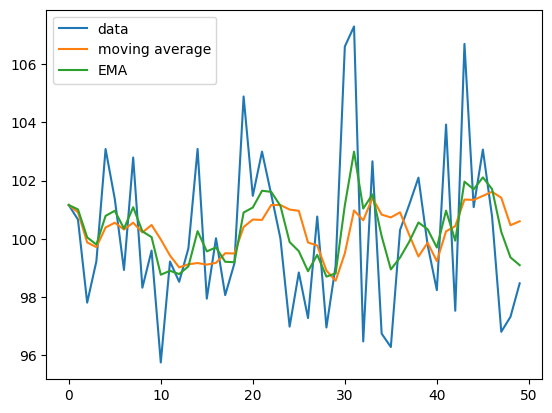

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# data = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])
data = prices = np.random.normal(100, 3, 50)
# data += np.arange(50)*0.5

# Moving Average
def moving_average(data, window_size):
    moving_averages = []
    for i in range(len(data)):
        if i < window_size:
            window = data[0:i+1]
        else:
            window = data[i-window_size+1:i+1]
        moving_averages.append(np.mean(window))
    return np.array(moving_averages)

# Exponential Moving Average
def exponential_moving_average(data, window_size):
    alpha = 0.7
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append( (alpha)*ema[i-1] + (1-alpha)*data[i] )

    return np.array(ema)

# Print the Moving Average and Exponential Moving Average of the sample data
# print("Sample data: ", data)
plt.plot(data)
plt.plot(moving_average(data, 7))
plt.plot(exponential_moving_average(data, 7))
plt.legend(["data", "moving average", "EMA"])

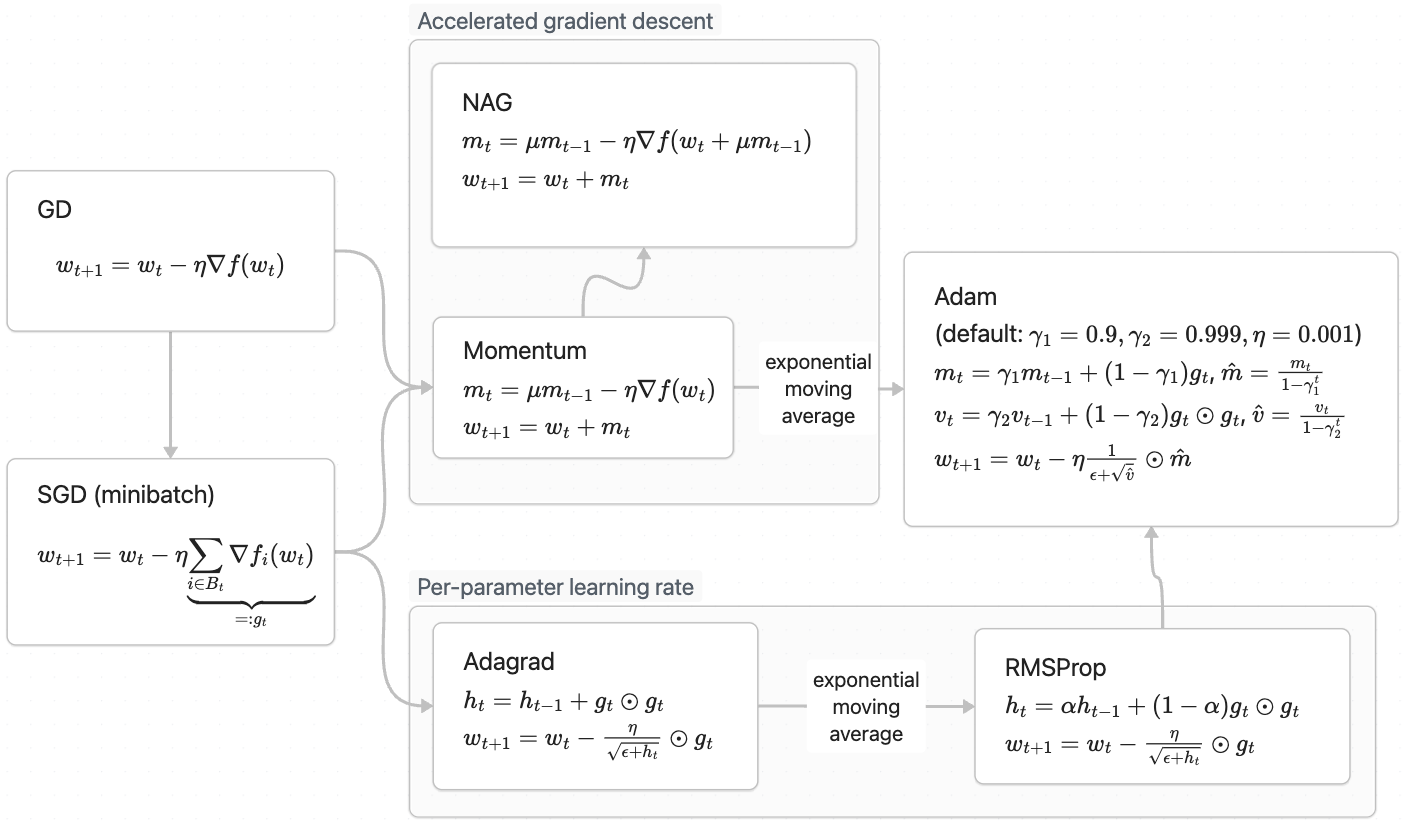

# 2. SGD variants

In [ ]:
# Define the linear regression loss function
def loss_function(w, x, y):
    # x [N x 2]
    return np.mean((np.dot(x, w) - y) ** 10)

# Define the gradient of the linear regression loss function
def gradient(w, x, y):
    return 10 * np.mean(x.T * (np.dot(x, w) - y)**9, 1)

# Define the minibatch SGD update rule
def sgd_update(w, x, y, learning_rate):
    grad = gradient(w, x, y)
    w -= learning_rate * grad / x.shape[0]
    return w

def adagrad_update(w, x, y, cache_adagrad, learning_rate):
    epsilon=1e-8
    grad = gradient(w, x, y)
    cache_adagrad += grad ** 2
    w -= learning_rate * grad / (np.sqrt(cache_adagrad + epsilon)) / x.shape[0]
    return w, cache_adagrad

def rmsprop_update(w, x, y, cache_rmsprop, learning_rate):
    epsilon=1e-8
    alpha = 0.9
    grad = gradient(w, x, y)
    cache_rmsprop = alpha*cache_rmsprop + (1-alpha)* grad ** 2
    w -= learning_rate * grad / (np.sqrt(cache_rmsprop + epsilon)) / x.shape[0]
    return w, cache_rmsprop

def adam_update(w, x, y, cache_adam1, cache_adam2, learning_rate, t):
    epsilon = 1e-8
    gamma1 = 0.9
    gamma2 = 0.999
    grad = gradient(w, x, y)

    # EMA
    cache_adam1 = gamma1*cache_adam1 + (1-gamma1) * grad
    cache_adam2 = gamma2*cache_adam2 + (1-gamma2) * (grad ** 2)

    # bias correction
    mhat = cache_adam1 / (1 - gamma1 ** t)
    vhat = cache_adam2 / (1 - gamma2 ** t)

    # update
    w -= learning_rate * mhat / (np.sqrt(vhat) + epsilon) / x.shape[0]
    return w, cache_adam1, cache_adam2

# Generate some data
N = 100
nfeature = 2
np.random.seed(0)
x = np.random.randn(N, 2)
w_true = np.array([1.0, 2.0])
# w_true = np.arange(nfeature)
y = np.dot(x, w_true) + 0.3 * np.random.randn(N) # generate data with noise
# y = f(w_true, x) + 0.1 * np.random.randn(N) # generate data with noise

# Initialize weights and hyperparameters
w_sgd = np.zeros(nfeature)
w_adagrad = np.copy(w_sgd)
w_rmsprop = np.copy(w_sgd)
w_adam = np.copy(w_sgd)
learning_rate = 0.001

cache_adagrad = np.zeros(nfeature)
cache_rmsprop = np.zeros(nfeature)
cache_adam1 = np.zeros(nfeature)
cache_adam2 = np.zeros(nfeature)

loss_sgd = []
loss_adagrad = []
loss_rmsprop = []
loss_adam = []

# run
iter = 1
for epoch in range(200):
    # Shuffle the data
    batch_size = 5
    permutation = np.random.permutation(N)

    for i in range(N // batch_size):
        idxs = permutation[i*batch_size:(i+1)*batch_size]

        # Update weights using SGD and AdaGrad
        w_sgd = sgd_update(w_sgd, x[idxs], y[idxs], learning_rate)
        w_adagrad, cache_adagrad = adagrad_update(w_adagrad, x[idxs], y[idxs], cache_adagrad, learning_rate)
        w_rmsprop, cache_rmsprop = rmsprop_update(w_rmsprop, x[idxs], y[idxs], cache_rmsprop, learning_rate)
        w_adam, cache_adam1, cache_adam2 = adam_update(w_adam, x[idxs], y[idxs], cache_adam1, cache_adam2, learning_rate, iter)

        iter += 1

        loss_sgd.append(loss_function(w_sgd, x, y))
        loss_adagrad.append(loss_function(w_adagrad, x, y))
        loss_rmsprop.append(loss_function(w_rmsprop, x, y))
        loss_adam.append(loss_function(w_adam, x, y))

    # Print the loss every 10 epochs
    # if epoch % 10 == 0:
    #     print(f'Epoch: {epoch}')
    #     print(f'SGD Loss: {loss_function(w_sgd, x, y)}')
    #     print(f'AdaGrad Loss: {loss_function(w_adagrad, x, y)}')

<ipython-input-67-a56865b4a75e>:29: RuntimeWarning: overflow encountered in power
  return np.mean((np.dot(x, w) - y) ** 10)
<ipython-input-67-a56865b4a75e>:33: RuntimeWarning: overflow encountered in power
  return 10 * np.mean(x.T * (np.dot(x, w) - y)**9, 1)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [ ]:
loss_sgd[:10]

[974359617.7425901,
 4.549974949055086e+44,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

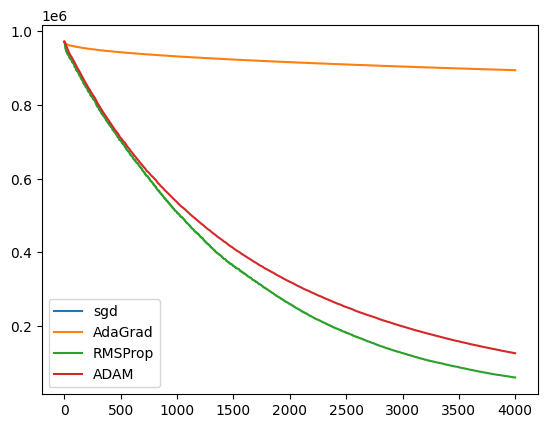

In [ ]:
plt.plot(loss_sgd[0:0])
plt.plot(loss_adagrad) # we can see that the convergence is slow in AdaGrad, since learning rate decreases
plt.plot(loss_rmsprop)
plt.plot(loss_adam)
# plt.yscale('log')
plt.legend(["sgd", "AdaGrad", "RMSProp", "ADAM"])

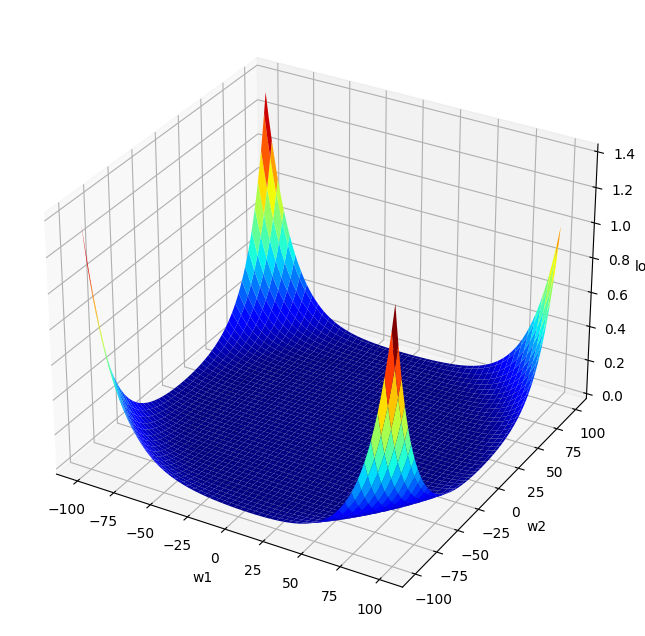

In [ ]:
# Define the weight space
w1_vals = np.linspace(-100, 100, 100)
w2_vals = np.linspace(-100, 100, 100)
w1_grid, w2_grid = np.meshgrid(w1_vals, w2_vals)

# Evaluate the loss function over the weight space
loss_grid = np.zeros_like(w1_grid)
for i in range(len(w1_vals)):
    for j in range(len(w2_vals)):
        w = np.array([w1_vals[i], w2_vals[j]])
        loss_grid[j,i] = loss_function(w, x, y)

# Plot the loss surface
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1_grid, w2_grid, loss_grid, cmap='jet')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('loss')
plt.show()